In [1]:
import fns
from fns import *
from fns.functionsTFhardbound import *
%matplotlib inline

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
# from bokeh.io import output_notebook
# from bokeh.plotting import figure, show, output_file
# output_notebook()
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTFhardbound loaded!
********************************************************************************


In [2]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

In [3]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# matplotlib.rc("font", family="Times")

## Colors

In [4]:
N1 = '#65CBFF'
N2 = '#9595C9'

In [17]:
tauv, sG, N, T, nu, k = 40, 0, 1000, 200000, 100, 0
ratio = 0.5
dt = 0.1
varPath = "../data/rasters/rastervarPlast4-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-%.2f_nu-%d" % (tauv, 
                                                                    sG, N, T, k, ratio, dt, nu)
var = np.load(varPath)

In [18]:
def csd(v1, v2, dt = 0.1, nperseg=512):
    '''
    '''
    f, p = signal.csd(v1,v2, fs=1/0.0001, nperseg=nperseg)
    return f.tolist(), p.tolist()


/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 4000)

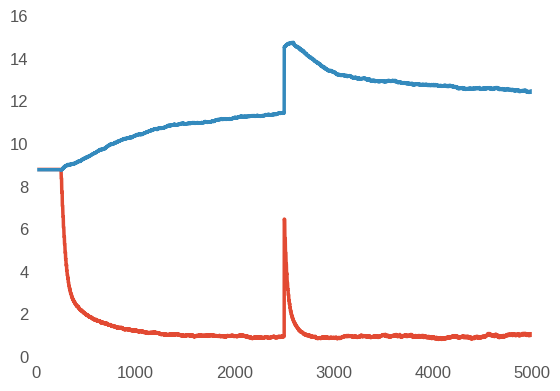

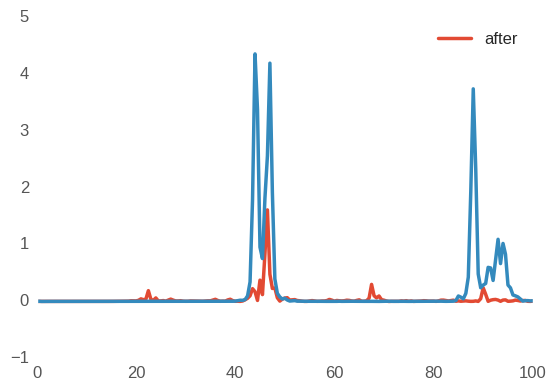

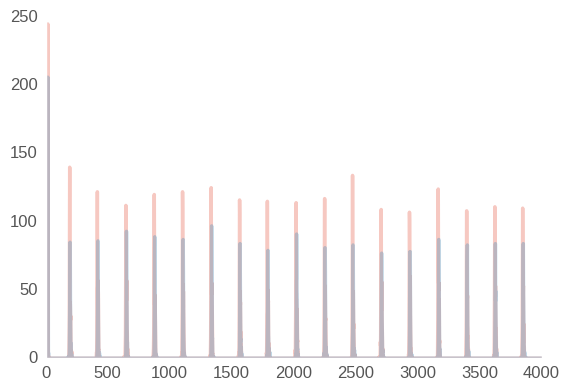

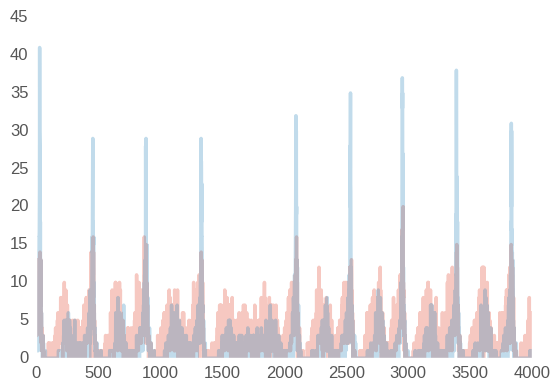

In [19]:
plt.plot(var['g1N1'])
plt.plot(var['g1N2'])
v1 = var['vvmN1'][180000:]
v2 = var['vvmN2'][180000:]
v10 = var['vvmN1'][0000:30000]
v20 = var['vvmN2'][0000:30000]

# print(fourier(v1[180000:190000]))
f0, p0 = csd(v10,v20, nperseg=20000)
f, p = csd(v1,v2, nperseg=20000)

plt.figure()
plt.plot(f, p, label='after')
plt.plot(f0, p0)
plt.legend()
plt.xlim([0,100])
plt.figure()
plt.plot(v10, alpha=0.3)
plt.plot(v20, alpha=0.3)
plt.xlim([0,4000])

plt.figure()
plt.plot(v1, alpha=0.3)
plt.plot(v2, alpha=0.3)
plt.xlim([0,4000])


In [64]:
df = pd.DataFrame(columns=('nu','tauv','ratio','sG','N',
                           'csdF_s', 'csdP_s', 'csdF_e', 'csdP_e', 'a0', 'm0',
                           'f1_s', 'p1_s', 'f2_s', 'p2_s',
                          'f1_e', 'p1_e', 'f2_e', 'p2_e') )
ratio = 0.5
tauv, sG, N, T, nu = 30, 100, 1000, 200000, 100
k=0
dt = 0.1
nulist = [100]
tauvlist = np.arange(15,35,5)
sGlist = np.arange(0,100,10)
i=-1
for tauv in tauvlist:
    for sG in sGlist:
        for nu in nulist:
            i+=1
#             rasterPath = "../data/rasters/rasterPlast4-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_nu-%d" % (tauv,                                                                            sG, N, T, nu, ratio)
#             r = np.load(rasterPath)
            varPath = "../data/rasters/rastervarPlast4-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-%.2f_nu-%d" % (tauv, sG, N, T, k, ratio, dt, nu)
            var = np.load(varPath)
            
            s = 70000
            e = 170000
            e0 = 110000
            d = 30000
            i1 = var['vvmN1']
            i2 = var['vvmN2']
            nperseg = 20000
            f, Pxy = csd(i1[s:s+d], i2[s:s+d], nperseg=nperseg)
            f0, Pxy0 = csd(i1[e0:e0+d], i2[e0:e0+d],nperseg=nperseg)
            f2, Pxy2 = csd(i1[e:e+d], i2[e:e+d], nperseg=nperseg)
            
            maxBegin = np.max(np.abs(Pxy))
            argmaxBegin = np.argmax(np.abs(Pxy))
            maxEnd = np.max(np.abs(Pxy2))
            argmaxEnd = np.argmax(np.abs(Pxy2))
            m0 = np.max(np.abs(Pxy0))
            a0 = np.argmax(np.abs(Pxy0))
        
            f1_s,p1_s = fourier(i1[s:s+d])
            f2_s,p2_s = fourier(i2[s:s+d])
            f1_e,p1_e = fourier(i1[e:e+d])
            f2_e,p2_e = fourier(i2[e:e+d])
            df.loc[i] = [nu, tauv, ratio, sG, N, 
                         argmaxBegin, maxBegin, argmaxEnd, maxEnd, 
                         a0, m0,
                         f1_s, p1_s, f2_s, p2_s, 
                         f1_e, p1_e, f2_e, p2_e, 
                         ]

In [65]:
df.to_csv(PAPER + 'csd_data.csv')

In [66]:
df[(df['sG']==50) & (df['nu']==100)]

,nu,tauv,ratio,sG,N,csdF_s,csdP_s,csdF_e,csdP_e,a0,m0,f1_s,p1_s,f2_s,p2_s,f1_e,p1_e,f2_e,p2_e
5,100.0,15.0,0.5,50.0,1000.0,128.0,4.608195,129.0,2.385461,126.0,3.082145,63.991468,5.933636,63.991468,5.927397,66.657779,4.469567,66.657779,4.492672
15,100.0,20.0,0.5,50.0,1000.0,121.0,5.786208,123.0,2.176780,119.0,4.485165,59.992001,6.711443,59.992001,6.265315,63.324890,4.853328,63.324890,3.617623
25,100.0,25.0,0.5,50.0,1000.0,108.0,6.242201,117.0,1.291322,106.0,2.260225,53.992801,5.208537,53.326223,5.122261,58.658845,1.791094,58.658845,0.701124
35,100.0,30.0,0.5,50.0,1000.0,101.0,3.710988,109.0,2.312070,93.0,1.931685,49.326756,7.335464,49.326756,7.929989,54.659379,5.043835,54.659379,3.787063


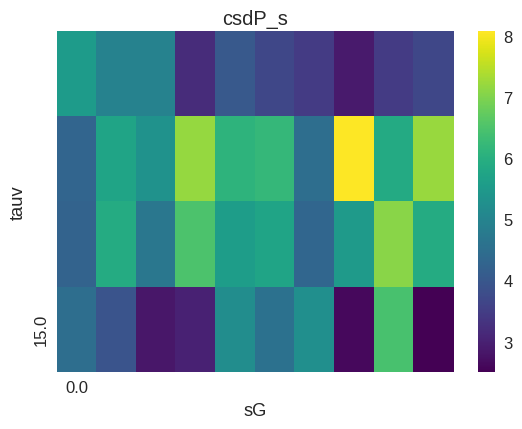

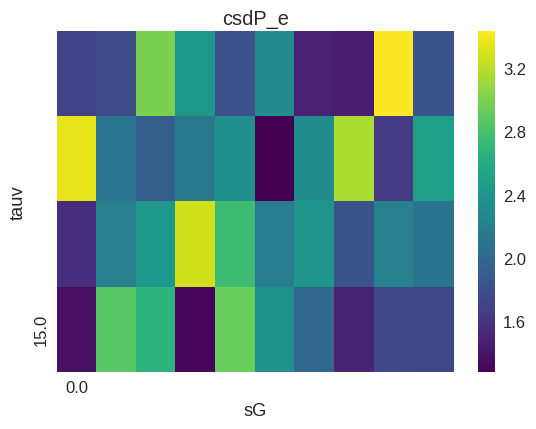

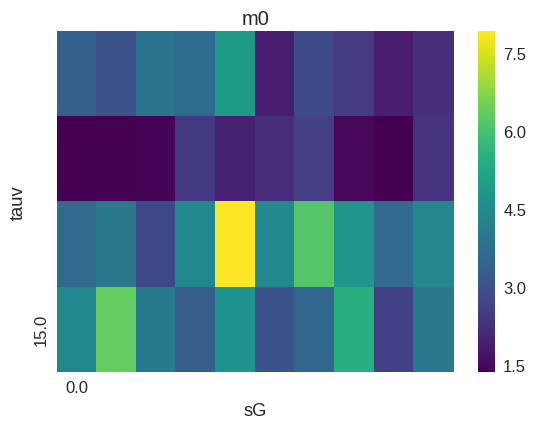

In [67]:
vmax = None
plotHeatmap(df[df['nu']==100], col='csdP_s', x='sG',y='tauv', cmap='viridis', vmax=vmax )
plt.savefig(PAPER + 'csd_before.pdf')
plotHeatmap(df[(df['nu']==100)], col='csdP_e', x='sG',y='tauv', cmap='viridis', vmax=vmax)
plt.savefig(PAPER + 'csd_after.pdf')
plotHeatmap(df[(df['nu']==100)], col='m0', x='sG',y='tauv', cmap='viridis', vmax=vmax)
plt.savefig(PAPER + 'csd_after0.pdf')


In [51]:
# plotHeatmap(df[(df['nu']==100) & (df['tauv']==15)], col='csdP_e', x='sG',y='tauv', cmap='viridis')

In [82]:
T=5000
d = 2000
sigma=0.01
apple = generateInput2(3, T)*20
pear = generateInput2(4, T)*20
m1s = float(mutual_info.mutual_information_2d((apple[1000:1000+d]), (gpu.i1[1000:1000+d]), 
                                                                     normalized=False, sigma=sigma) )
m1e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (gpu.i1[T-d:T]), 
                                                                    normalized=False, sigma=sigma))

m2s = float(mutual_info.mutual_information_2d((apple[1000:1000+d]), (gpu.i2[1000:1000+d]), 
                                                                     normalized=False, sigma=sigma) )
m2e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (gpu.i2[T-d:T]), 
                                                                    normalized=False, sigma=sigma))

print(m1s, m1e)
print(m2s, m2e)

2.8442460555170603 2.861970663914489
2.680447571418598 2.782699753857922


In [79]:
np.random.seed(2)
a = np.random.rand(100)
np.random.seed(5)
b = np.random.rand(100)
sigma = 0.01
normalized=True
print(mutual_info.mutual_information_2d(a, b, sigma =sigma, normalized=normalized))
print(mutual_info.mutual_information_2d(apple, pear, sigma =sigma, normalized=normalized))

0.911904587725
0.222938631675


In [76]:
np.random.seed(2)
a = np.random.rand(100)
np.random.seed(5)
b = np.random.rand(100)
print(np.corrcoef(a,b)[0,1])
print(np.corrcoef(apple, pear)[0,1])

0.0602079582477
0.0773966545894


In [78]:
s=1000
c1s = np.corrcoef(apple[s:s+d], gpu.i1[s:s+d])[0,1]
c1e = np.corrcoef(apple[T-d:T], gpu.i1[T-d:T])[0,1]

c2s = np.corrcoef(apple[s:s+d], gpu.i2[s:s+d])[0,1]
c2e = np.corrcoef(apple[T-d:T], gpu.i2[T-d:T])[0,1]
print(c1s, c1e)
print(c2s, c2e)

s=1000
c1s = np.corrcoef(apple[s:s+d], gpu.vvmN1[s:s+d])[0,1]
c1e = np.corrcoef(apple[T-d:T], gpu.vvmN1[T-d:T])[0,1]

c2s = np.corrcoef(apple[s:s+d], gpu.vvmN2[s:s+d])[0,1]
c2e = np.corrcoef(apple[T-d:T], gpu.vvmN2[T-d:T])[0,1]
print(c1s, c1e)
print(c2s, c2e)

0.407279189367 0.360063049331
0.57160733491 0.466459675266
0.0342970402992 0.0197004126374
0.00579691410785 -0.00151396962304


## N = 2000

In [41]:
df = pd.DataFrame(columns=('tauv', 'sG', 'both', 'T', 'N', 'nu',
                           'cor', 'f', 'p', 'max', 'argmax', 'begin', 'net'
                          )  )

i=0
N = 2000
dt = 0.1
T = 20000
s0 = 0
d2 = int(1000//dt)-s0
end = T
both = True
nuList = [0,50,100,150]

ratio = 0.5
for nu in nuList:
#         for tauv in np.arange(15,90, 5):
    for tauv in [15,30,45,60,90]:
#                 for sG in np.arange(0,30,2):
                for sG in  [0,10,50,100,200]:
                    for begin in [True, False]:
                        for net in  ['N1', 'N2']:
                            i+=1
                            extension = extension = "-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-%.1f" % (tauv, sG, N, T, nu,  ratio, dt)
                            filename = "../data/rasters/rastervarPlast2" + extension
                            if i==1: 
                                print(filename)
                            a = np.load(filename)
                            i1 = a['i1N1']
                            i2 = a['i1N2']
                            v1 = a['vvmN1']
                            v2 = a['vvmN2']
                            
                            if begin:
                                cor = round(np.corrcoef(v1[s0:s0+d2], v2[s0:s0+d2])[0,1],1)
                                fcsd, Pxy = csd(v1[s0:s0+d2], v2[s0:s0+d2], nperseg=10000)
                                if net=='N1':
                                    f = fourier(v1[s0:s0+d2])[0]
                                    p = fourier(v1[s0:s0+d2])[1]
                                else:
                                    f = fourier(v2[s0:s0+d2])[0]
                                    p = fourier(v2[s0:s0+d2])[1]
                            else:
                                cor = round(np.corrcoef(v1[T-d2:T], v2[T-d2:T])[0,1],1)
                                fcsd, Pxy = csd(v1[T-d2:T], v2[T-d2:T], nperseg=10000)
                                if net=='N1':
                                    f = fourier(v1[T-d2:T])[0]
                                    p = fourier(v1[T-d2:T])[1]
                                else:
                                    f = fourier(v2[T-d2:T])[0]
                                    p = fourier(v2[T-d2:T])[1]
                            
                            maxi = np.max(np.abs(Pxy))
                            argmax = np.argmax(np.abs(Pxy))





        #                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), float(a['cor1']), float(a['cor2']) ]
                            df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), int(nu),
                                         cor, f, p, maxi, argmax, not begin, net!='N1']

../data/rasters/rastervarPlast2-tauv-15_g-0_N-2000_T-20000_k-0_r-0.50_dt-0.1


/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 10000, is greater than input length = 9999, using nperseg = 9999
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


In [93]:
def plotGrid(df, col, title='', cols=['cor1', 'cor2', 'corChange'], **kws):
    data = pd.melt(df, id_vars=['tauv', 'sG', 'begin', 'net'], value_vars=cols)

    with sns.plotting_context(font_scale=5.5):
        g = sns.FacetGrid(data, col="begin", row="net" )
    cbar_ax = g.fig.add_axes([.90, .3, .02, .4])
    g = g.map_dataframe(facet_heatmap2, col=col, cols=cols,cbar_ax=cbar_ax, **kws)
    for ax in g.axes.flat:
        ax.set_title("")
        ax.set_yticklabels([90,60,45,30,15])
        ax.set_xticklabels([0,10,50,100,200])
        
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize='16')
    g.fig.subplots_adjust(right=.85)
    g.savefig(PAPER + 'power-plot_%s.png' % col)

def plotGrid2(df, col, title='', cols=['cor1', 'cor2', 'corChange'], **kws):
    data = pd.melt(df, id_vars=['tauv', 'sG', 'begin'], value_vars=cols)

    with sns.plotting_context(font_scale=5.5):
        g = sns.FacetGrid(data, col="begin" )
    cbar_ax = g.fig.add_axes([.90, .3, .02, .4])
    g = g.map_dataframe(facet_heatmap2, col=col, cols=cols,cbar_ax=cbar_ax, **kws)
    for ax in g.axes.flat:
        ax.set_title("")
        ax.set_yticklabels([90,60,45,30,15])
        ax.set_xticklabels([0,10,50,100,200])
        
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize='16')
    g.fig.subplots_adjust(right=.85)
    g.savefig(PAPER + 'power-plot_%s.png' % col)

/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


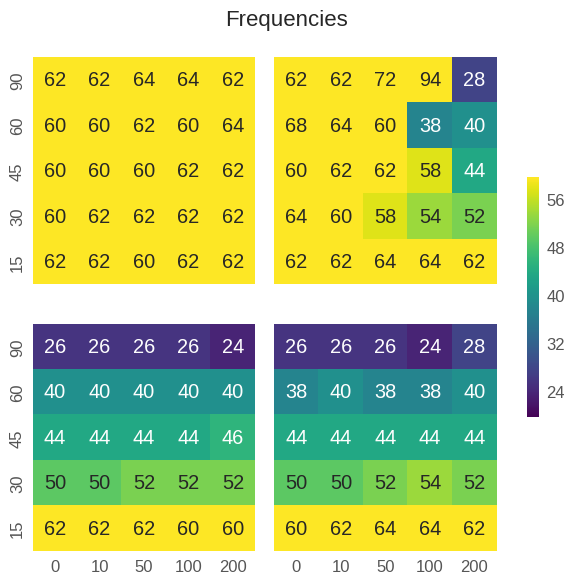

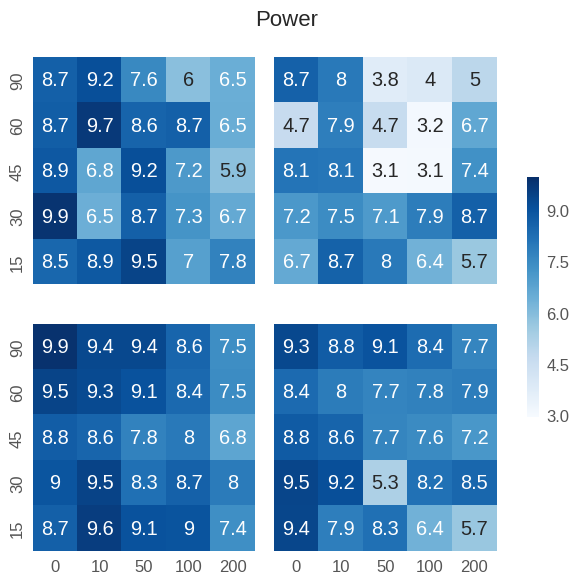

In [74]:
cols = ['f', 'p']
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid(df[df['nu']==100], 'f', 'Frequencies',cmap="viridis", 
         cols = cols, vmin=20, vmax=60)
plt.savefig(PAPER + 'fig4-freq.eps')
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid(df[df['nu']==100], 'p', 'Power',cmap="Blues", 
         cols = cols, vmin=3, vmax=10)
plt.savefig(PAPER + 'fig4-power.eps')

/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


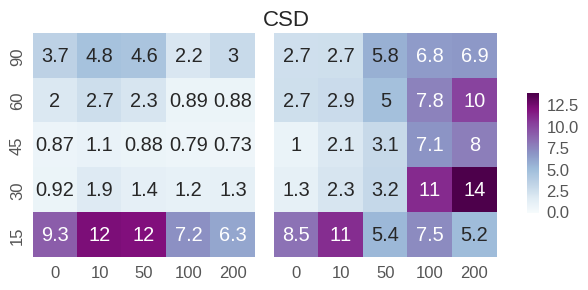

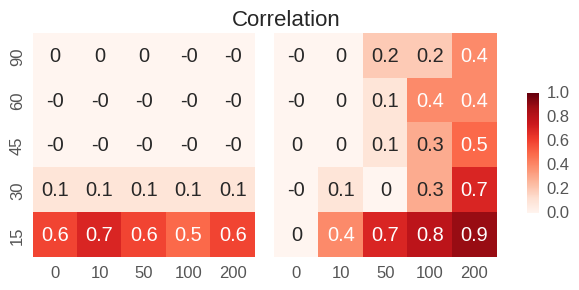

In [99]:
cols = ['max', 'cor']
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid2(df[(df['nu']==100) & (df['net']==True)], 'max', 'CSD',cmap="BuPu", 
         cols = cols, vmin=0, vmax=14)
plt.savefig(PAPER + 'fig4-csd.eps')
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid2(df[(df['nu']==100) & (df['net']==True)], 'cor', 'Correlation',cmap="Reds", 
         cols = cols, vmin=0, vmax=1)
plt.savefig(PAPER + 'fig4-cor.eps')

In [97]:
df[(df['nu']==100) & (df['net']==True)]

,tauv,sG,both,T,N,nu,cor,f,p,max,argmax,begin,net
202,15.0,0.0,True,20000.0,2000.0,100.0,0.6,61.975210,8.705313,9.302341,62.0,False,True
204,15.0,0.0,True,20000.0,2000.0,100.0,0.0,59.976010,9.405847,8.470135,59.0,True,True
206,15.0,10.0,True,20000.0,2000.0,100.0,0.7,61.975210,9.624164,12.389116,62.0,False,True
208,15.0,10.0,True,20000.0,2000.0,100.0,0.4,61.975210,7.917980,11.176441,60.0,True,True
210,15.0,50.0,True,20000.0,2000.0,100.0,0.6,61.975210,9.081234,12.205043,62.0,False,True
212,15.0,50.0,True,20000.0,2000.0,100.0,0.7,63.974410,8.270614,5.439879,64.0,True,True
214,15.0,100.0,True,20000.0,2000.0,100.0,0.5,59.976010,9.041609,7.237614,62.0,False,True
216,15.0,100.0,True,20000.0,2000.0,100.0,0.8,63.974410,6.394848,7.475238,63.0,True,True
218,15.0,200.0,True,20000.0,2000.0,100.0,0.6,59.976010,7.446022,6.266970,64.0,False,True
220,15.0,200.0,True,20000.0,2000.0,100.0,0.9,61.975210,5.720603,5.197176,59.0,True,True


In [26]:
tauv = 45
sG=50
extension = extension = "-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-%.1f" % (tauv, sG, N, T, nu,  ratio, dt)
filename = "../data/rasters/rastervarPlast2" + extension
a = np.load(filename)
i1 = a['i1N1']
i2 = a['i1N2']
v1 = a['vvmN1']
v2 = a['vvmN2']

/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 100)

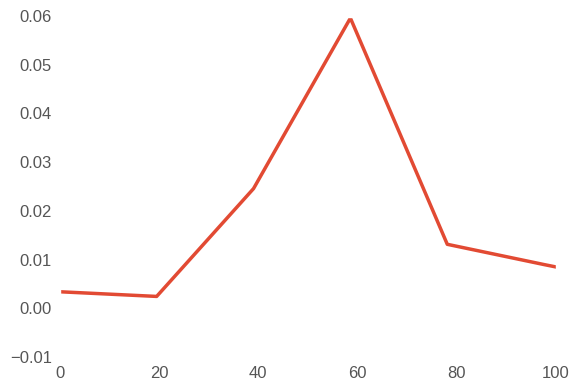

In [29]:
f,p = csd(v1,v2)
plt.plot(f,p)
plt.xlim([0,100])

## N = 1000

In [116]:
df = pd.DataFrame(columns=('tauv', 'sG', 'both', 'T', 'N', 'nu',
                           'cor', 'f', 'p', 'max', 'argmax', 'begin', 'net'
                          )  )

i=0
N = 1000
dt = 0.1
T = 10000
s0 = 0
d2 = int(500//dt)-s0
end = T
both = True
nuList = [100]
k=0
ratio = 0.5
for nu in nuList:
#         for tauv in np.arange(15,90, 5):
    for tauv in np.arange(15,60,5):
#                 for sG in np.arange(0,30,2):
                for sG in  np.arange(0,100,10):
                    for begin in [True, False]:
                        for net in  ['N1', 'N2']:
                            i+=1
                            extension = extension = "-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-%.2f_nu-%d" % (tauv, sG, N, T, k,  ratio, dt, nu)
                            filename = "../data/rasters/rastervarPlast5" + extension
                            if i==1: 
                                print(filename)
                            a = np.load(filename)
                            i1 = a['i1N1']
                            i2 = a['i1N2']
                            v1 = a['vvmN1']
                            v2 = a['vvmN2']
                            
                            if begin:
                                cor = round(np.corrcoef(v1[s0:s0+d2], v2[s0:s0+d2])[0,1],1)
                                fcsd, Pxy = csd(v1[s0:s0+d2], v2[s0:s0+d2], nperseg=5000)
                                if net=='N1':
                                    f = fourier(v1[s0:s0+d2])[0]
                                    p = fourier(v1[s0:s0+d2])[1]
                                else:
                                    f = fourier(v2[s0:s0+d2])[0]
                                    p = fourier(v2[s0:s0+d2])[1]
                            else:
                                cor = round(np.corrcoef(v1[T-d2:T], v2[T-d2:T])[0,1],1)
                                fcsd, Pxy = csd(v1[T-d2:T], v2[T-d2:T], nperseg=5000)
                                if net=='N1':
                                    f = fourier(v1[T-d2:T])[0]
                                    p = fourier(v1[T-d2:T])[1]
                                else:
                                    f = fourier(v2[T-d2:T])[0]
                                    p = fourier(v2[T-d2:T])[1]
                            
                            maxi = np.max(np.abs(Pxy))
                            argmax = np.argmax(np.abs(Pxy))





        #                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), float(a['cor1']), float(a['cor2']) ]
                            df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), int(nu),
                                         cor, f, p, maxi, argmax, not begin, net!='N1']

../data/rasters/rastervarPlast5-tauv-15_g-0_N-1000_T-10000_k-0_r-0.50_dt-0.10_nu-100


/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 5000, is greater than input length = 4999, using nperseg = 4999
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


In [117]:
def facet_heatmap3(data, col='cor1', cols=['cor1', 'cor2', 'corChange'], **kws):
    #     data = pd.melt(df, id_vars=['tauv', 'sG'], value_vars=cols)
    data = data[data['variable'] == col]
    data = data.pivot(index='tauv', columns='sG', values='value')
    im = sns.heatmap(data, **kws)
    im.invert_yaxis()
    
def plotGrid3(df, col, title='', cols=['cor1', 'cor2', 'corChange'], **kws):
    data = pd.melt(df, id_vars=['tauv', 'sG', 'begin', 'net'], value_vars=cols)

    with sns.plotting_context(font_scale=5.5):
        g = sns.FacetGrid(data, col="begin", row="net" )
    cbar_ax = g.fig.add_axes([.90, .3, .02, .4])
    g = g.map_dataframe(facet_heatmap3, col=col, cols=cols,cbar_ax=cbar_ax, annot=False, **kws)
    for ax in g.axes.flat:
        ax.set_title("")
#         ax.set_yticklabels([90,60,45,30,15])
#         ax.set_xticklabels([0,10,50,100,200])
        
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize='16')
    g.fig.subplots_adjust(right=.85)
    g.savefig(PAPER + 'power-plot_%s.png' % col)

/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


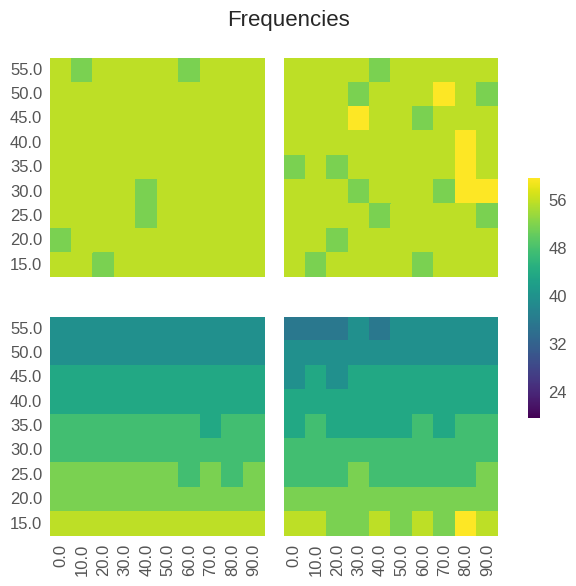

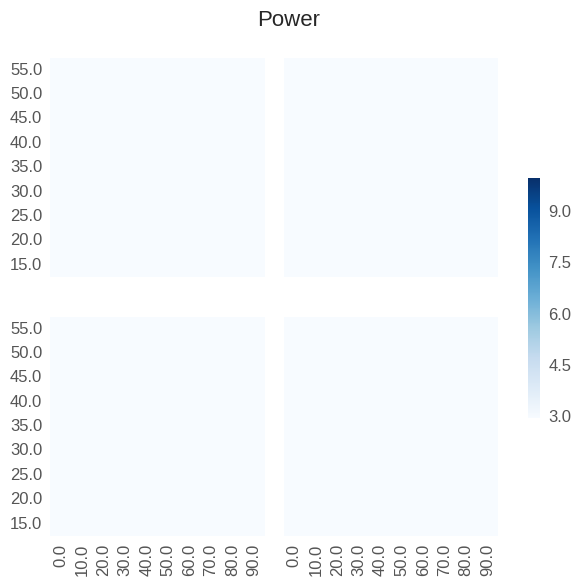

In [118]:
cols = ['f', 'p']
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid3(df[df['nu']==100], 'f', 'Frequencies',cmap="viridis", 
         cols = cols, vmin=20, vmax=60)
plt.savefig(PAPER + 'fig4-freq1000.eps')
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid3(df[df['nu']==100], 'p', 'Power',cmap="Blues", 
         cols = cols, vmin=3, vmax=10)
plt.savefig(PAPER + 'fig4-power1000.eps')

In [133]:
tauv, sG, N, T, nu, k = 55, 90, 1000, 10000, 100, 0
ratio = 0.5
dt = 0.1
varPath = "../data/rasters/rastervarPlast5-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f_dt-%.2f_nu-%d" % (tauv, 
                              sG, N, T, k, ratio, dt, nu)
var = np.load(varPath)

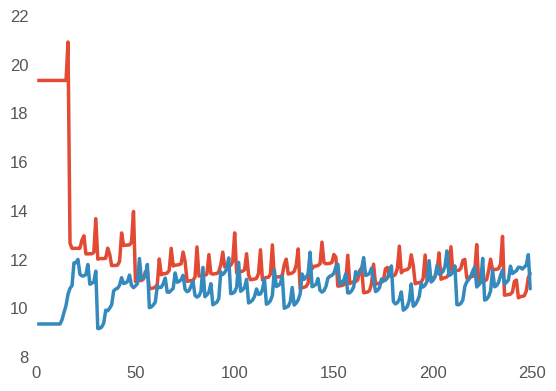

In [134]:
plt.plot(var['g1N2'])
plt.plot(var['g1N1'])

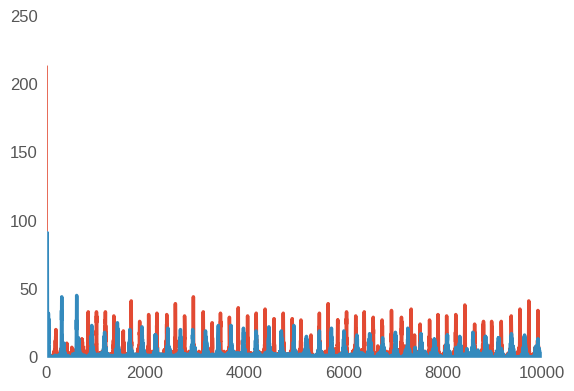

In [135]:
plt.plot(var['vvmN1'])
plt.plot(var['vvmN2'])